In [12]:
# Imports
import numpy as np
import rcca
import matplotlib.pyplot as plt
# from brewer2mpl import qualitative
from palettable.colorbrewer import qualitative
%matplotlib inline
from mpl_toolkits import mplot3d

# Initialize number of samples
nSamples = 1000

# Define two latent variables (number of samples x 1)
latvar1 = np.random.randn(nSamples,)
latvar2 = np.random.randn(nSamples,)

# Define independent components for each dataset (number of observations x dataset dimensions)
indep1 = np.random.randn(nSamples, 4)
indep2 = np.random.randn(nSamples, 5)

# Create two datasets, with each dimension composed as a sum of 75% one of the latent variables and 25% independent component
data1 = 0.25*indep1 + 0.75*np.vstack((latvar1, latvar2, latvar1, latvar2)).T
data2 = 0.25*indep2 + 0.75*np.vstack((latvar1, latvar2, latvar1, latvar2, latvar1)).T

# Split each dataset into two halves: training set and test set
train1 = data1[:nSamples//2]
train2 = data2[:nSamples//2]
test1 = data1[nSamples//2:]
test2 = data2[nSamples//2:]

In [13]:
data1

array([[ 0.94778869, -0.18147461,  0.20848708, -0.84397369],
       [-0.90026153, -1.12786694, -1.11628964, -1.19971146],
       [ 1.24232553, -1.18284445,  0.58363246, -1.22011949],
       ...,
       [ 0.19111946, -0.30376129,  0.35402066, -0.10575333],
       [-0.1029803 ,  0.78025967, -0.10437415,  1.02972234],
       [-0.08912172,  0.66745341, -0.2134454 ,  0.42431123]])

In [3]:
# Create a cca object as an instantiation of the CCA object class. 
nComponents = 4
cca = rcca.CCA(kernelcca = False, reg = 0., numCC = nComponents)

# Use the train() method to find a CCA mapping between the two training sets.
cca.train([train1, train2])

# Use the validate() method to test how well the CCA mapping generalizes to the test data.
# For each dimension in the test data, correlations between predicted and actual data are computed.
testcorrs = cca.validate([test1, test2])

Training CCA, kernel = None, regularization = 0.0000, 4 components


In [4]:
testcorrs


[array([0.88132225, 0.89527784, 0.90646134, 0.87993032]),
 array([0.89057608, 0.90750894, 0.87624527, 0.90569142, 0.87911707])]

The canonical correlations are:

Component 1: 0.96

Component 2: 0.95

Component 3: 0.17

Component 4: 0.04




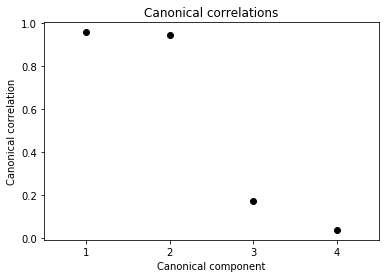

In [7]:
# Plot canonical correlations (cca.cancorrs)
plt.plot(np.arange(nComponents)+1, cca.cancorrs, 'ko')
plt.xlim(0.5, 0.5+nComponents)
plt.xticks(np.arange(nComponents)+1)
plt.xlabel('Canonical component')
plt.ylabel('Canonical correlation')
plt.title('Canonical correlations')
print('''The canonical correlations are:\n
Component 1: %.02f\n
Component 2: %.02f\n
Component 3: %.02f\n
Component 4: %.02f\n
''' % tuple(cca.cancorrs))

In [8]:
cca.cancorrs

array([0.95629736, 0.94526538, 0.17150757, 0.03671387])

The prediction accuracy for the first dataset is:

Dimension 1: 0.88

Dimension 2: 0.90

Dimension 3: 0.91

Dimension 4: 0.88


The prediction accuracy for the second dataset is:

Dimension 1: 0.89

Dimension 2: 0.91

Dimension 3: 0.88

Dimension 4: 0.91

Dimension 5: 0.88




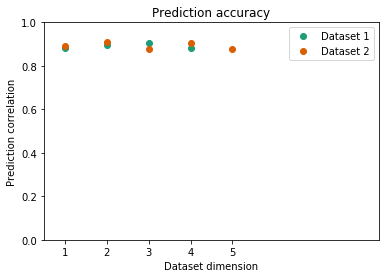

In [9]:
# Plot correlations between actual test data and predictions 
# obtained by projecting the other test dataset via the CCA mapping for each dimension.
nTicks = max(testcorrs[0].shape[0], testcorrs[1].shape[0])
# bmap1 = qualitative.Dark2[3]
bmap1 = qualitative.Dark2_3
plt.plot(np.arange(testcorrs[0].shape[0])+1, testcorrs[0], 'o', color = bmap1.mpl_colors[0])
plt.plot(np.arange(testcorrs[1].shape[0])+1, testcorrs[1], 'o', color = bmap1.mpl_colors[1])
plt.xlim(0.5, 0.5 + nTicks + 3)
plt.ylim(0.0, 1.0)
plt.xticks(np.arange(nTicks)+1)
plt.xlabel('Dataset dimension')
plt.ylabel('Prediction correlation')
plt.title('Prediction accuracy')
plt.legend(['Dataset 1', 'Dataset 2'])
print('''The prediction accuracy for the first dataset is:\n
Dimension 1: %.02f\n
Dimension 2: %.02f\n
Dimension 3: %.02f\n
Dimension 4: %.02f\n
'''% tuple(testcorrs[0]))
print('''The prediction accuracy for the second dataset is:\n
Dimension 1: %.02f\n
Dimension 2: %.02f\n
Dimension 3: %.02f\n
Dimension 4: %.02f\n
Dimension 5: %.02f\n
'''% tuple(testcorrs[1]))